# Law of Large Numbers and the Central Limit Theorem

Last time, we analyzed some random walks and made some observations. Today, we'll look at the theorems that back up our observations. 

### Random numbers from random numbers 


Let's say we have a probability distribution from which we sample some random $x$'s. We can then form new randoms numbers $y$ from the average of the $x$s:

$$y_n = \frac{x_1 + x_2 + ... + x_n}{n}.$$

How are the $y_n$'s distributed? 

### Coin-tossing example
More concretely: We toss a coin over and over again, if it's heads, I win 1 money so $x=1$, if it's tails I lose 1 money, so $x = -1$. If I play $n$ games, my average winning per game is $y_n$. It's pretty clear that on average, I should break even: 

$$ \text{average of } y_n = 0. $$

But in any given sequence of $n$ games, it is certainly possible that I do better than break even, i.e., $y_n > 0$. I would like to do know the probability of this outcome. The answer to this question lies in the probability distribution function associated with $y_n$.  

### Experimental design

* We are going to sample $y_n$ 1000 times each for n=1,2,3,...,200
* We will plot the histogram showing how $y_n$ is distributed at each $n$
* We will record the mean of $y_n$ at each $n$
* We will record the standard deviation at each $n$

In [1]:
from math import sqrt, pi, e

def hist_and_fit(x_t, num_bins):
    plt.axis([-50,50,0,0.1])
    _, _, _ = plt.hist(x_t, num_bins, normed=True)

    mu = np.mean(x_t)
    sigma = np.std(x_t)
    x_pdf = np.linspace(-1,1,300)
    y_pdf = 1/(sqrt(2*pi)*sigma)*e**(-0.5*(x_pdf-mu)**2/sigma**2)
    plt.plot(x_pdf, y_pdf)    

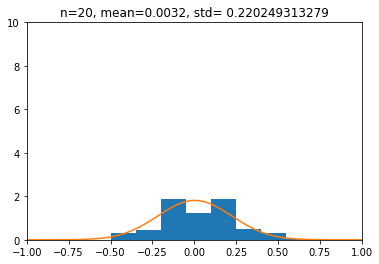

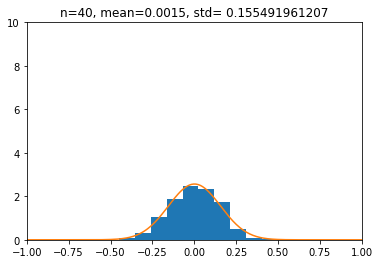

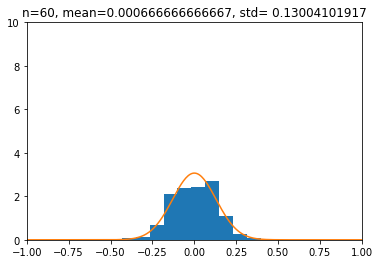

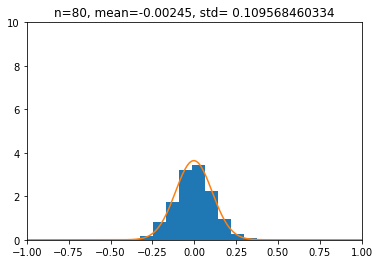

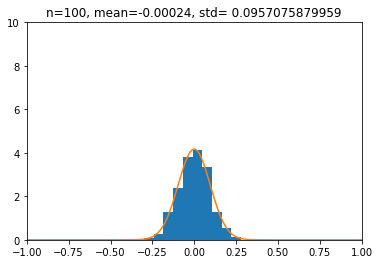

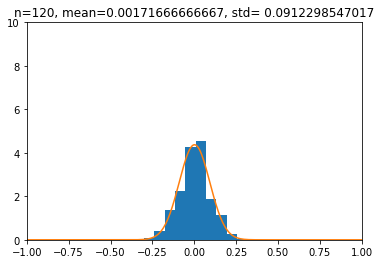

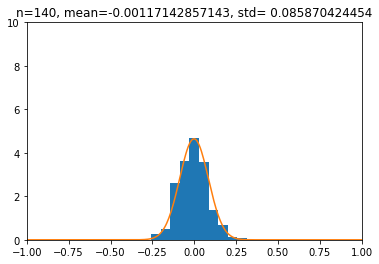

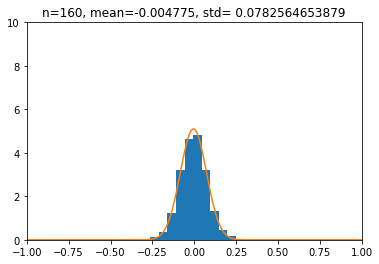

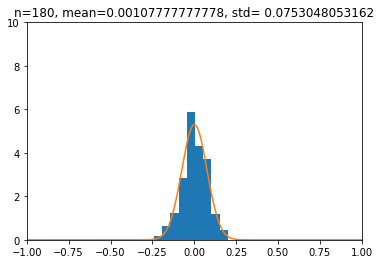

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed("yello")
N = 1000
max_n = 200
means = []
stds = []

for n in range(1, max_n):
    YY = np.zeros(N)  # this is where we store the y_n's
    for i in range(N):
        # compute average of n coin-tossing games
        YY[i] = sum([random.choice([-1,1]) for _ in range(n)]) / float(n)
    means.append(np.mean(YY))
    stds.append(np.std(YY))
    if n % 20 == 0:
        plt.figure()
        plt.title("n=" + str(n) + ", mean=" + str(means[-1]) +  ", std= " + str(stds[-1]))
        hist_and_fit(YY, 10)
        plt.axis([-1,1,0,10])

Observations:
* Looks like the distribution of $y_n$'s is centered at zero. 
* The distribution of $y_n$'s is looking sharper and sharper, more and more likely to be close to zero as n increases.
* The distribution of $y_n$'s is looking more and more like a normal distribution

**Theorem**: (Law of Large Numbers) If we are sampling $x_1,...,x_n$ from a probability distribution $X$, and look at the probability distribution of the average:

$$y_n = \frac{x_1 + x_2 + ... + x_n}{n},$$

then, 

$$P((\lim_{n\rightarrow \infty} y_n) = \mu ) = 1$$

where $\mu$ is the mean of $X$. 

*Remark*: This is regardless of what probability distribution $X$ is drawn from. 

Is the mean of our 1000 samplings of $y_n$ really going to the mean of $X$ as $n$ increases?

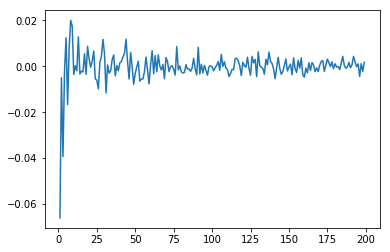

In [3]:
plt.plot(range(1,max_n), means)

What about the standard deviation?

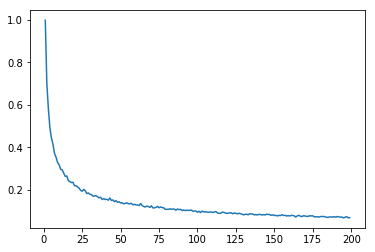

In [4]:
plt.plot(range(1,max_n), stds)

It looks like the standard deviation is also going to 0. That is certainly consistent with the Law of Large Numbers. 

But we can say more. The way in which the standard deviation is going to zero is familiar. Could it be $1/n$?

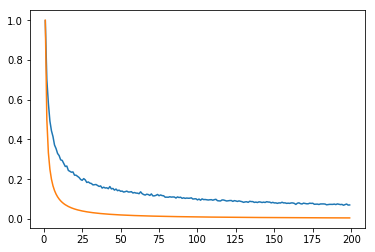

In [5]:
plt.plot(range(1,max_n), stds)
plt.plot(range(1,max_n), 1 / np.array(range(1,max_n), dtype=float))

Not quite. Maybe $\frac{1}{\sqrt{n}}$?

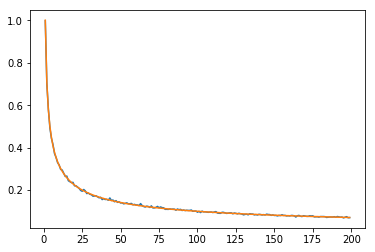

In [6]:
plt.plot(range(1,max_n), stds)
plt.plot(range(1,max_n), 1 / np.sqrt(np.array(range(1,max_n), dtype=float)))

Whoa, perfect fit! So as $n\rightarrow \infty$, the mean of the nth average is going to 0 and the standard deviation is going to $\frac{1}{\sqrt{n}}$. 

But the mean and standard deviation of the $x$s are: 

In [7]:
samples_of_x = [random.choice([-1,1]) for _ in range(10000)]
print 'mean of x =', np.mean(samples_of_x)
print 'std dev of x =', np.std(samples_of_x) 

mean of x = -0.014
std dev of x = 0.999901995198


**Cental Limit Theorem** Let $x_n$ be drawn from a probability distribution with mean $\mu$ and standard deviation $\sigma$, and let

$$y_n = \frac{x_1 + x_2 + ... + x_n}{n}$$

be the average. As $n \rightarrow \infty$, the distribution of $y_n$ approaches the normal distribution:

$$N(\mu, \frac{\sigma}{\sqrt{n}})$$

with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

**Relation to Lecture 20**: Steps in our random walk form a sequence of $-1$s and $+1$s, just like our coin-tossing game. Also the walker's position is just the sum of those steps, which in our coin-tossing game is $ny_n$. The analysis here tells us that the standard deviation of $ny_n$ is $n \frac{1}{\sqrt{n}} = \sqrt{n}$, as we found empirically in Lecture 20. 

**Remark:** Note that the Central Limit Theorem applies regardless of the shape of the distribution of $x$. This means that if you have many things averaging out, whatever they are, you are certain to get a normal distribution! That's why the normal distribution is the most standard distribution in all of statistics. 